In [1]:

# import module list is independent on respective file.
import yfinance as yf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from datetime import datetime as dt
from datetime import date as date
from datetime import timedelta
from dateutil.relativedelta import relativedelta


from scipy.stats import mstats
import japanize_matplotlib
from tqdm.notebook import tqdm


In [3]:
a=pd.read_csv('testdata/25811start.csv', index_col=0, parse_dates=True)
b=pd.read_csv('testdata/36912start.csv', index_col=0, parse_dates=True)

In [32]:
c=pd.read_csv('testdata/25811_raw.csv', index_col=0, parse_dates=True)
d=pd.read_csv('testdata/36912start_raw.csv', index_col=0, parse_dates=True)

In [7]:
data = pd.concat([a, b]).rename_axis('Date').sort_values(by='Date')

In [33]:
data2 = pd.concat([c, d]).rename_axis('Date').sort_values(by='Date')

In [70]:
start = 2015 # year

def Yield(data, start=2015):
    df2 = data.set_index([data.index.year,data.index.month, data.index])
    df2.index.names = ['year', 'month', 'date']

    display(df2.query('year<=@start+@i & month <=9')['interest'].tail(4))
    dic2 = {2015+i:df2.query('year<=@start+@i & month <=9')['interest'].tail(8).sum()/ df2.query('year<=@start+@i & month <=9')['open_price'].tail(8).mean() for i in range(8) }
    df = pd.DataFrame.from_dict(dic2, orient='index').rename(columns={0:'Return'})
    return df
df=Yield(data)
sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)
sharp_ratio

year  month  date      
2022  5      2022-05-01     9.661785
      6      2022-06-01     4.554216
      8      2022-08-01    10.406795
      9      2022-09-01     4.631100
Name: interest, dtype: float64

2.0680448345697053

In [72]:
#df.index = [ f'{str(i+1)}.3' for i in df.index]
df

,Return
2016.3,0.495075
2017.3,0.375658
2018.3,0.254982
2019.3,0.025777
2020.3,0.453129
2021.3,0.606219
2022.3,0.359634
2023.3,0.597915


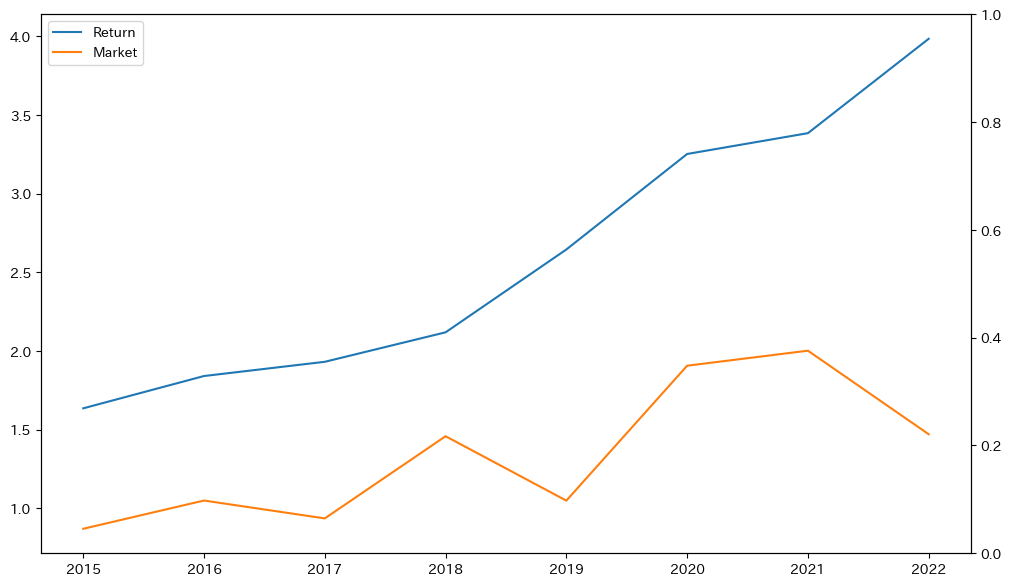

In [56]:
fig, ax = plt.subplots(figsize=(12, 7))
ax2 = ax.twinx()
df=Yield(data)
df['Market'] = Yield(data2)['Return'] 
(1+np.cumsum(df)).plot(ax=ax)
df['hist'] = df['Return'] - df['Market']

#ax2.hist(df['hist'],alpha=0.5, color='pink')
plt.savefig('graph_image/shift.png')

In [59]:
data

,Return,Market,hist
2015,0.635453,-0.130081,0.765535
2016,0.205269,0.179505,0.025764
2017,0.090343,-0.113627,0.203970
2018,0.187337,0.522338,-0.335001
2019,0.526488,-0.409314,0.935802
2020,0.606935,0.857460,-0.250525
2021,0.132238,0.095340,0.036898
2022,0.599840,-0.530927,1.130766


In [58]:
def Evaluation(df):
    Sel = pd.Series()
    Sel['初期資金'] = df['open_price'][0]
    
    Sel["全トレード数"] = df.shape[0]
    #print((10**2) * df.query('interest >= 0').count() / df.shape[0])
    Sel["勝率"] = "{:.2f}%".format((10**2) * df.query('interest >= 0').shape[0] / df.shape[0])
    Sel["負率"] = "{:.2f}%".format((10**2)* df.query('interest < 0').shape[0] / df.shape[0])
    Sel["全トレード平均利益"] = df['interest'].mean()
    Sel["勝ちトレード平均利益"] =  df.query('interest >= 0')['interest'].mean()
    Sel["負けトレード平均利益"] =  df.query('interest < 0')['interest'].mean()
    
    Sel["プロフィットファクター"] = df.query('interest >= 0')['interest'].sum() / -df.query('interest < 0')['interest'].sum()
    
    display(pd.DataFrame(Sel))
    fig, ax = plt.subplots()
    ax.hist(df['interest'], bins=20, label='interest')
Evaluation(df)

KeyError: 'open_price'

In [9]:
sharp_ratio = np.mean(data['Return']) /np.std(data['Return'], ddof=1)
sharp_ratio*np.sqrt((12/(12/8)))

2.006549251073026

In [12]:
df_list = {}
for ticker in ['IYR', 'RWR', 'XLRE', 'VNQ']:
    df_list[ticker] = pd.read_csv('testdata/'+ticker+'dataframe.csv', index_col=0, parse_dates=True)

In [11]:
datelist = pd.date_range(start='2011-01-01', end='2023-06-01', freq='1MS')

In [43]:
datadict = {}
SET = set()
for i in tqdm(datelist):
    Asset, cum = 0, 0
    for ticker in ['IYR', 'RWR', 'XLRE', 'VNQ']:
        temp = df_list[ticker]
        try:
            temp2 = temp.loc[i.strftime('%Y-%m-%d'), :]
        except:
            continue
        if not temp.loc[i.strftime('%Y-%m-%d'), :].isna().any():
            SET.add(ticker)
        Asset += temp2['open_price']
        cum += temp2['interest']
        
    Return = cum / Asset
    datadict.update({i:[Return, SET]})

  0%|          | 0/150 [00:00<?, ?it/s]

In [50]:
df

,Return,Ticker
2011-01-01,0.030000,"{XLRE, IYR, VNQ, RWR}"
2011-02-01,-0.013714,"{XLRE, IYR, VNQ, RWR}"
2011-03-01,0.030000,"{XLRE, IYR, VNQ, RWR}"
2011-04-01,0.054466,"{XLRE, IYR, VNQ, RWR}"
2011-05-01,-0.047336,"{XLRE, IYR, VNQ, RWR}"
...,...,...
2023-02-01,-0.123374,"{XLRE, IYR, VNQ, RWR}"
2023-03-01,-0.003777,"{XLRE, IYR, VNQ, RWR}"
2023-04-01,0.030000,"{XLRE, IYR, VNQ, RWR}"
2023-05-01,0.017266,"{XLRE, IYR, VNQ, RWR}"


In [45]:
df = pd.DataFrame.from_dict(datadict, orient='index',columns=['Return', 'Ticker'])

単利計算です。各y値は、その時点までの各利率の累積です。
最大ドローダウン: 14.412 %


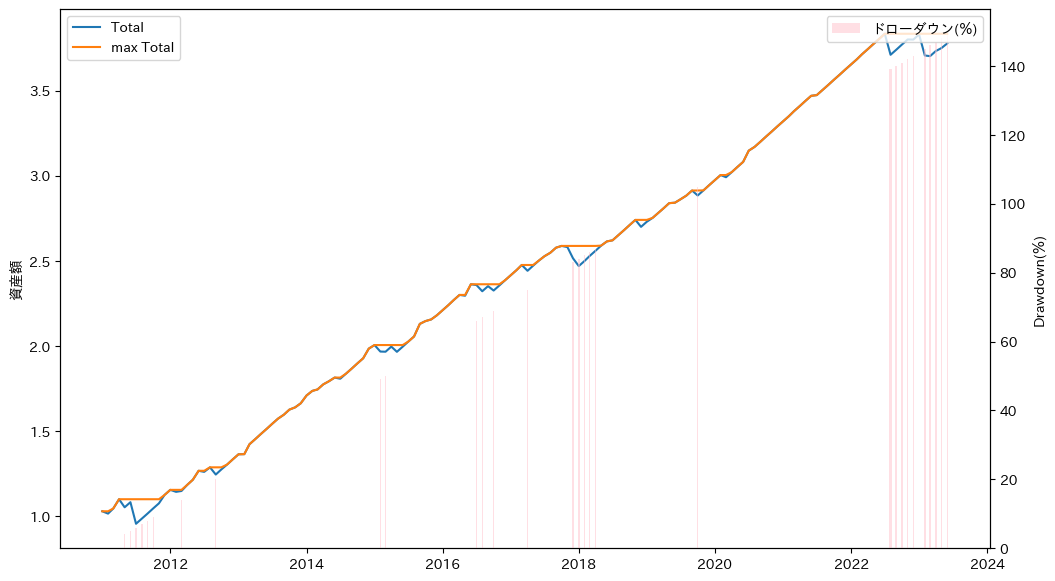

In [53]:
print("単利計算です。各y値は、その時点までの各利率の累積です。")
temp = df["Return"].values



profit_month = np.array(temp)

# 単利運用での資産額の計算
total = 1 + np.cumsum(profit_month)

# 月ごとのそれまでの最大資産の計算
max_assets = pd.Series(total).cummax().values

# ドローダウンの計算
dd = max_assets - total

# 最大ドローダウンの計算
max_dd_percent = max(dd) * 100
print(f'最大ドローダウン: {max_dd_percent:.3f} %')

fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()

ax1.set_ylabel('資産額')
ax1.plot(df.index,total, label='Total')
ax1.plot(df.index, max_assets, label='max Total')
ax1.legend()

ax2.set_ylabel('Drawdown(％)')
ax2.bar(df.index, np.arange(len(dd)), dd*100, alpha=0.5, color='pink', label='ドローダウン(％)')
ax2.legend(loc='upper right')
plt.savefig('graph_image/summation_distribution.png')